In [3]:
import os
print(os.getcwd())

C:\Users\Global\Fabric project\WFDD\grey cloth


In [5]:
import os
import shutil

folder1 = r'C:\Users\Global\Fabric project\WFDD\grey cloth\Good'
folder2 = r'C:\Users\Global\Fabric project\WFDD\grey cloth\Good1'
destination = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'

# Create merged folder if not exists
os.makedirs(destination, exist_ok=True)

count = 1

# Copy from Folder_1 with renaming
print("Copying Folder 1...")
for filename in sorted(os.listdir(folder1)):
    ext = filename.split('.')[-1]  # get extension
    new_name = f'img{count}.{ext}'
    src = os.path.join(folder1, filename)
    dst = os.path.join(destination, new_name)
    shutil.copy(src, dst)
    count += 1

print("Copying Folder 2...")
for filename in sorted(os.listdir(folder2)):
    ext = filename.split('.')[-1]
    new_name = f'img{count}.{ext}'
    src = os.path.join(folder2, filename)
    dst = os.path.join(destination, new_name)
    shutil.copy(src, dst)
    count += 1

print(f"Total Images Copied: {count-1}")


Copying Folder 1...
Copying Folder 2...
Total Images Copied: 309


In [5]:
import os

# Path to your folder
folder_path = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
# Count files (images)
total_images = len(os.listdir(folder_path))

print(f"Total Number of Images in Folder: {total_images}")


Total Number of Images in Folder: 309


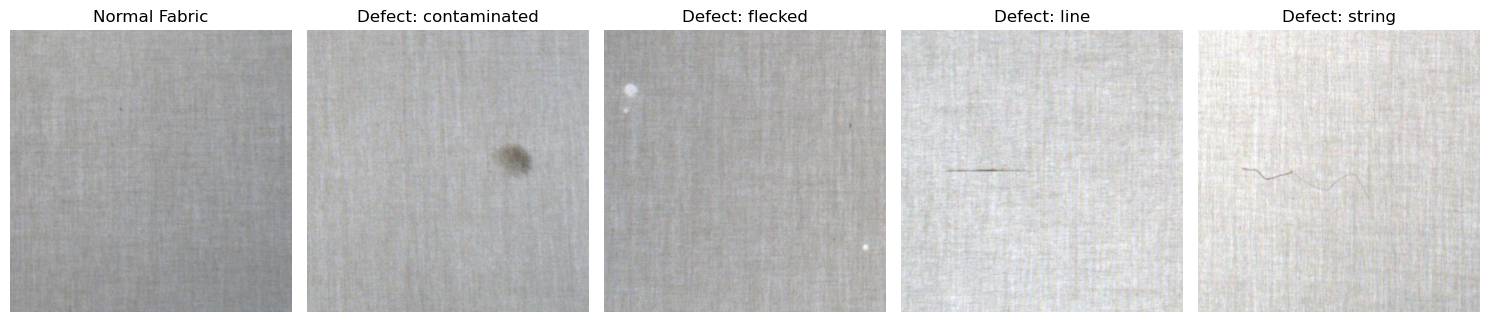

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set your folders
normal_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Get the first normal image
normal_files = os.listdir(normal_folder)
if not normal_files:
    raise FileNotFoundError("No normal images found!")
normal_image_path = os.path.join(normal_folder, normal_files[0])
normal_image = Image.open(normal_image_path)

# Prepare to store one image per defect type
defect_images = []

# Loop through each defect subfolder
for subfolder in os.listdir(defect_folder):
    subfolder_path = os.path.join(defect_folder, subfolder)
    if os.path.isdir(subfolder_path):
        defect_files = os.listdir(subfolder_path)
        if defect_files:
            defect_image_path = os.path.join(subfolder_path, defect_files[0])
            defect_images.append((subfolder, Image.open(defect_image_path)))
        else:
            print(f"No images in defect subfolder: {subfolder}")

# Plot Normal + Defect images side-by-side
plt.figure(figsize=(15, 5))

# Plot normal image
plt.subplot(1, len(defect_images)+1, 1)
plt.imshow(normal_image)
plt.title("Normal Fabric")
plt.axis('off')

# Plot each defect image
for i, (defect_type, image) in enumerate(defect_images, start=2):
    plt.subplot(1, len(defect_images)+1, i)
    plt.imshow(image)
    plt.title(f"Defect: {defect_type}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
import os
from PIL import Image
import numpy as np

# Set folder paths
normal_folder =r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
defect_folder =r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Process normal image
normal_files = os.listdir(normal_folder)
if not normal_files:
    raise FileNotFoundError("No files found in normal folder!")
normal_image_path = os.path.join(normal_folder, normal_files[0])
normal_image = Image.open(normal_image_path)  # open in original format
normal_mode = normal_image.mode
normal_array = np.array(normal_image)

print("Normal Image Mode:", normal_mode)
print("Normal Image Shape:", normal_array.shape)
print("Normal Image Pixel Values (Top-left 5x5):\n", normal_array[:5, :5])

# Process each defect subfolder
for subfolder in os.listdir(defect_folder):
    subfolder_path = os.path.join(defect_folder, subfolder)
    if os.path.isdir(subfolder_path):
        defect_files = os.listdir(subfolder_path)
        if defect_files:
            defect_image_path = os.path.join(subfolder_path, defect_files[0])
            defect_image = Image.open(defect_image_path)  # open in original format
            defect_mode = defect_image.mode
            defect_array = np.array(defect_image)
            
            print(f"\nDefect Type: {subfolder}")
            print("Defect Image Mode:", defect_mode)
            print("Defect Image Shape:", defect_array.shape)
            print("Defect Image Pixel Values (Top-left 5x5):\n", defect_array[:5, :5])
        else:
            print(f"\nWarning: No images found in defect subfolder '{subfolder}'")


Normal Image Mode: RGB
Normal Image Shape: (512, 512, 3)
Normal Image Pixel Values (Top-left 5x5):
 [[[165 165 165]
  [168 168 168]
  [172 172 170]
  [169 169 167]
  [170 171 166]]

 [[165 165 165]
  [170 170 168]
  [173 173 171]
  [169 170 165]
  [172 171 166]]

 [[162 162 162]
  [169 169 167]
  [173 173 171]
  [169 168 166]
  [173 172 168]]

 [[163 163 163]
  [169 169 169]
  [174 174 172]
  [172 171 169]
  [178 177 173]]

 [[174 174 176]
  [171 171 173]
  [175 175 175]
  [178 176 177]
  [176 175 173]]]

Defect Type: contaminated
Defect Image Mode: RGB
Defect Image Shape: (512, 512, 3)
Defect Image Pixel Values (Top-left 5x5):
 [[[179 181 170]
  [184 185 177]
  [180 181 175]
  [179 178 176]
  [185 180 184]]

 [[184 186 175]
  [186 187 179]
  [184 183 178]
  [180 179 177]
  [183 178 182]]

 [[187 189 176]
  [187 187 177]
  [187 186 181]
  [184 180 177]
  [181 177 178]]

 [[183 183 171]
  [184 184 174]
  [187 184 177]
  [185 181 178]
  [183 177 179]]

 [[175 176 162]
  [179 179 167]
  [

Total Normal Images: 309
Total Defect Images: 59
Defect Counts by Type:
contaminated: 20
flecked: 14
line: 9
string: 16


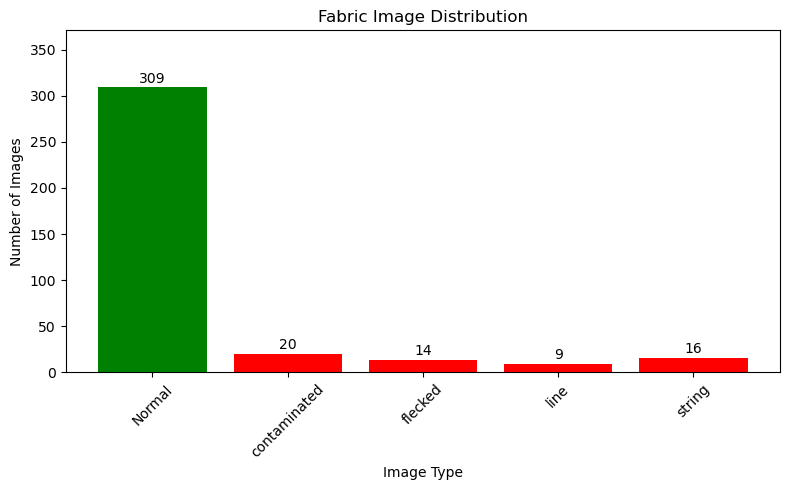

In [9]:
import os
import matplotlib.pyplot as plt

# Define paths for your image folders
normal_folder =r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
defect_folder =r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Define valid image extensions (adjust as needed)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

# Function to count images in a folder (non-recursive)
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(image_extensions)])

# Count normal images using the function above
normal_count = count_images(normal_folder)

# Count defect images by iterating over each subfolder within the defect folder.
defect_counts_by_type = {}
for item in os.listdir(defect_folder):
    subfolder_path = os.path.join(defect_folder, item)
    if os.path.isdir(subfolder_path):
        defect_counts_by_type[item] = count_images(subfolder_path)

# Calculate the total number of defect images (if needed)
total_defect_count = sum(defect_counts_by_type.values())

# Print counts
print(f"Total Normal Images: {normal_count}")
print(f"Total Defect Images: {total_defect_count}")
print("Defect Counts by Type:")
for defect_type, count in defect_counts_by_type.items():
    print(f"{defect_type}: {count}")

# Create a bar chart to visualize the image distribution:
# One bar for the normal images, plus one bar per defect type.
categories = ['Normal'] + list(defect_counts_by_type.keys())
counts = [normal_count] + list(defect_counts_by_type.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['green'] + ['red'] * len(defect_counts_by_type))

# Adding counts on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 2, f'{height}', ha='center', va='bottom')

plt.title("Fabric Image Distribution")
plt.xlabel("Image Type")
plt.ylabel("Number of Images")
plt.ylim(0, max(counts) * 1.2)  # add some space on the top for text
plt.xticks(rotation=45)  # rotate labels if they are long
plt.tight_layout()
plt.show()


Normal Image Shape: (512, 512, 3)
Sample RGB values from Normal Image (Top-left 5x5 pixels):
 [[[165 165 165]
  [168 168 168]
  [172 172 170]
  [169 169 167]
  [170 171 166]]

 [[165 165 165]
  [170 170 168]
  [173 173 171]
  [169 170 165]
  [172 171 166]]

 [[162 162 162]
  [169 169 167]
  [173 173 171]
  [169 168 166]
  [173 172 168]]

 [[163 163 163]
  [169 169 169]
  [174 174 172]
  [172 171 169]
  [178 177 173]]

 [[174 174 176]
  [171 171 173]
  [175 175 175]
  [178 176 177]
  [176 175 173]]]

Defect Type: contaminated
Defect Image Shape: (512, 512, 3)
Sample RGB values from Defect Image (Top-left 5x5 pixels):
 [[[179 181 170]
  [184 185 177]
  [180 181 175]
  [179 178 176]
  [185 180 184]]

 [[184 186 175]
  [186 187 179]
  [184 183 178]
  [180 179 177]
  [183 178 182]]

 [[187 189 176]
  [187 187 177]
  [187 186 181]
  [184 180 177]
  [181 177 178]]

 [[183 183 171]
  [184 184 174]
  [187 184 177]
  [185 181 178]
  [183 177 179]]

 [[175 176 162]
  [179 179 167]
  [183 180 173]

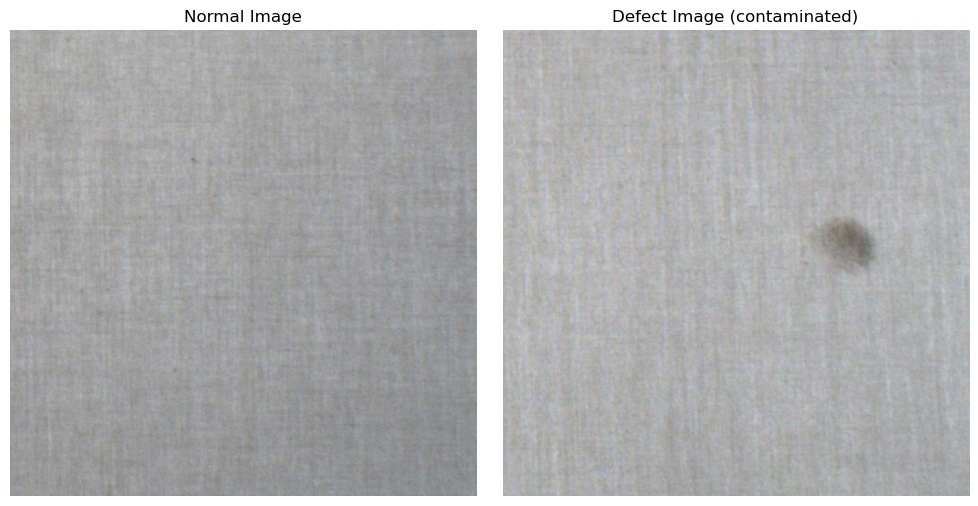

In [11]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set folder paths
normal_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Function to check valid image files by extension (adjust as needed)
def is_image_file(filename, extensions=('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
    return filename.lower().endswith(extensions)

# Process the normal folder
normal_files = [f for f in os.listdir(normal_folder) if is_image_file(f)]
if not normal_files:
    raise ValueError("No valid image files found in the normal folder.")
normal_image_path = os.path.join(normal_folder, normal_files[0])
normal_image = Image.open(normal_image_path).convert("RGB")
normal_array = np.array(normal_image)

# Print normal image details
print("Normal Image Shape:", normal_array.shape)
print("Sample RGB values from Normal Image (Top-left 5x5 pixels):\n", normal_array[:5, :5])

# Process the defect folder which contains subfolders for different defect types
defect_subfolders = [d for d in os.listdir(defect_folder) if os.path.isdir(os.path.join(defect_folder, d))]

if not defect_subfolders:
    raise ValueError("No subfolders found in the defect folder.")

# Iterate over each defect subfolder and process the first valid image in each
for subfolder in defect_subfolders:
    subfolder_path = os.path.join(defect_folder, subfolder)
    defect_files = [f for f in os.listdir(subfolder_path) if is_image_file(f)]
    if not defect_files:
        print(f"No valid images in defect subfolder: {subfolder}")
        continue
    defect_image_path = os.path.join(subfolder_path, defect_files[0])
    defect_image = Image.open(defect_image_path).convert("RGB")
    defect_array = np.array(defect_image)
    
    # Print defect image details for this defect type
    print(f"\nDefect Type: {subfolder}")
    print("Defect Image Shape:", defect_array.shape)
    print("Sample RGB values from Defect Image (Top-left 5x5 pixels):\n", defect_array[:5, :5])

# Optionally, you can visualize the normal and one defect image from a specific defect type
# For example, plot the normal image and the first defect image from the first subfolder
if defect_subfolders:
    first_defect_path = os.path.join(defect_folder, defect_subfolders[0])
    first_defect_files = [f for f in os.listdir(first_defect_path) if is_image_file(f)]
    if first_defect_files:
        sample_defect_image = Image.open(os.path.join(first_defect_path, first_defect_files[0])).convert("RGB")
        
        # Create a side-by-side plot
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(normal_image)
        plt.title("Normal Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(sample_defect_image)
        plt.title(f"Defect Image ({defect_subfolders[0]})")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()


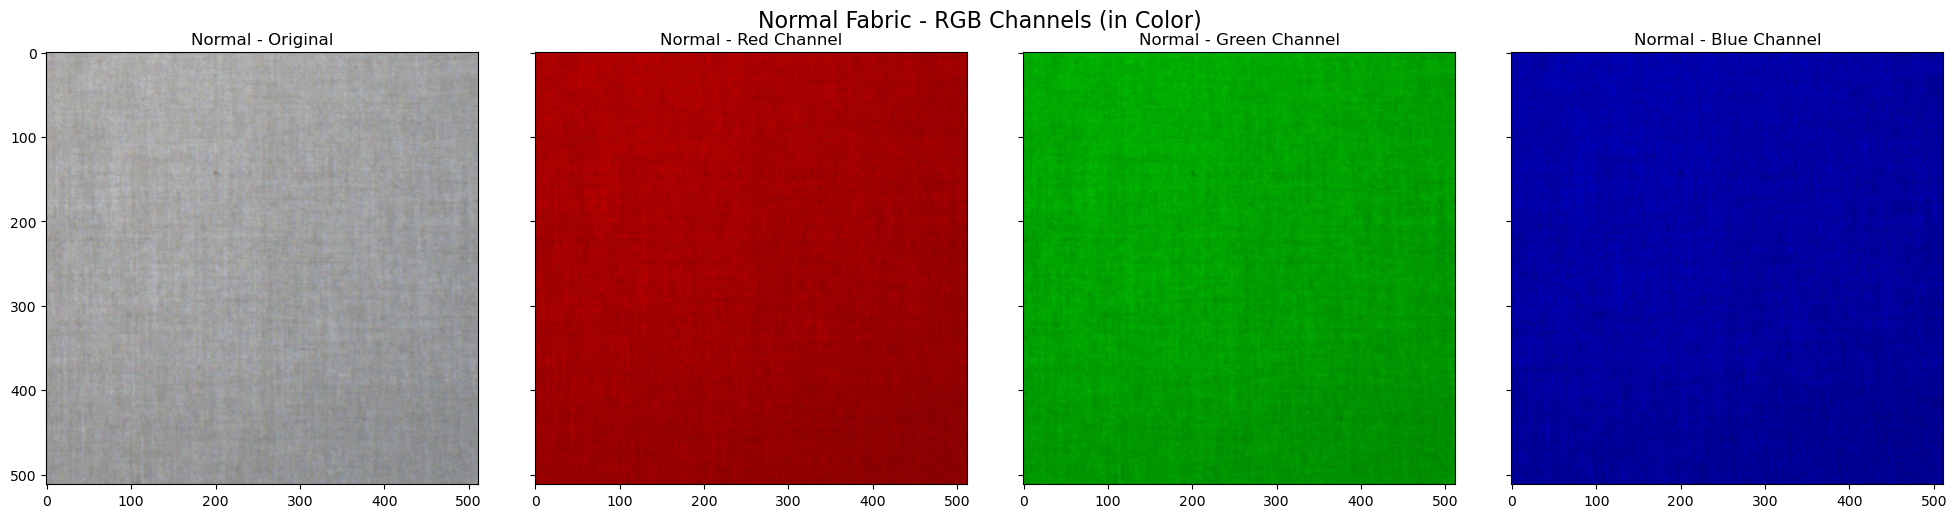

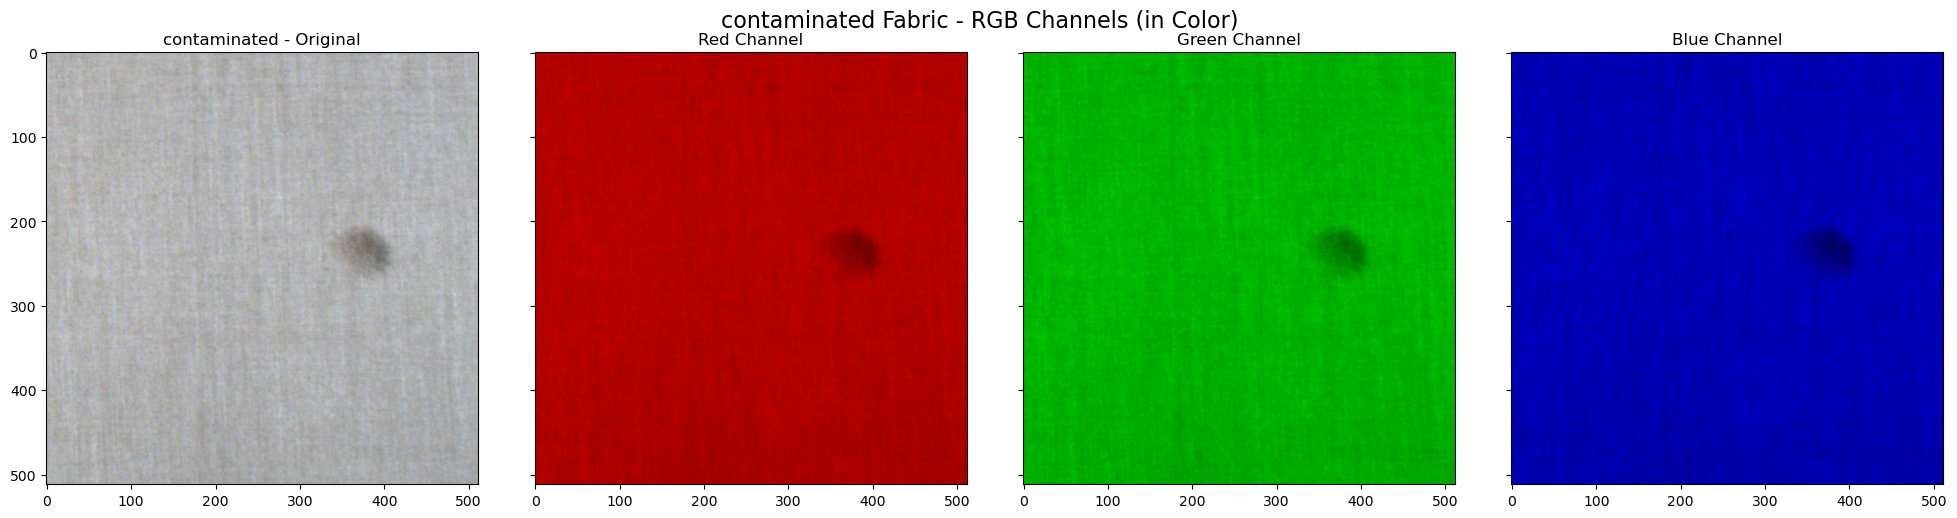

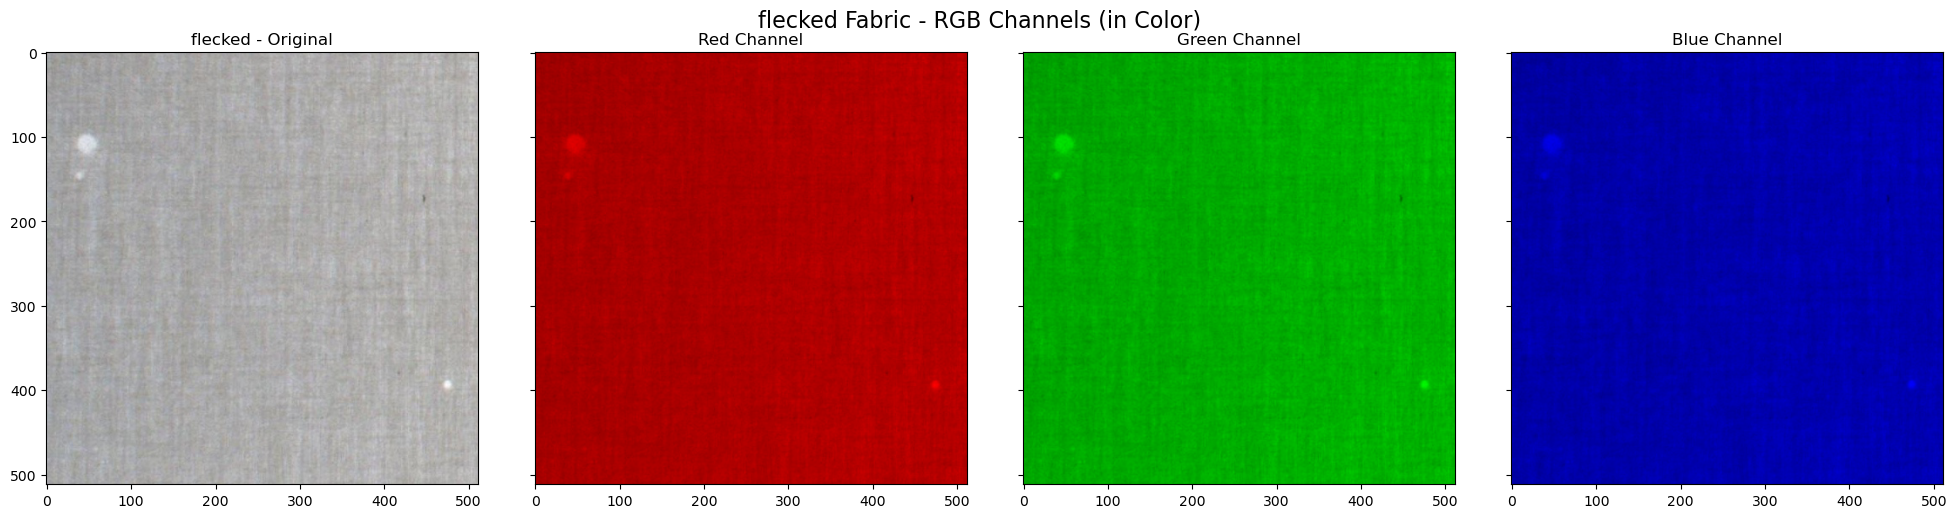

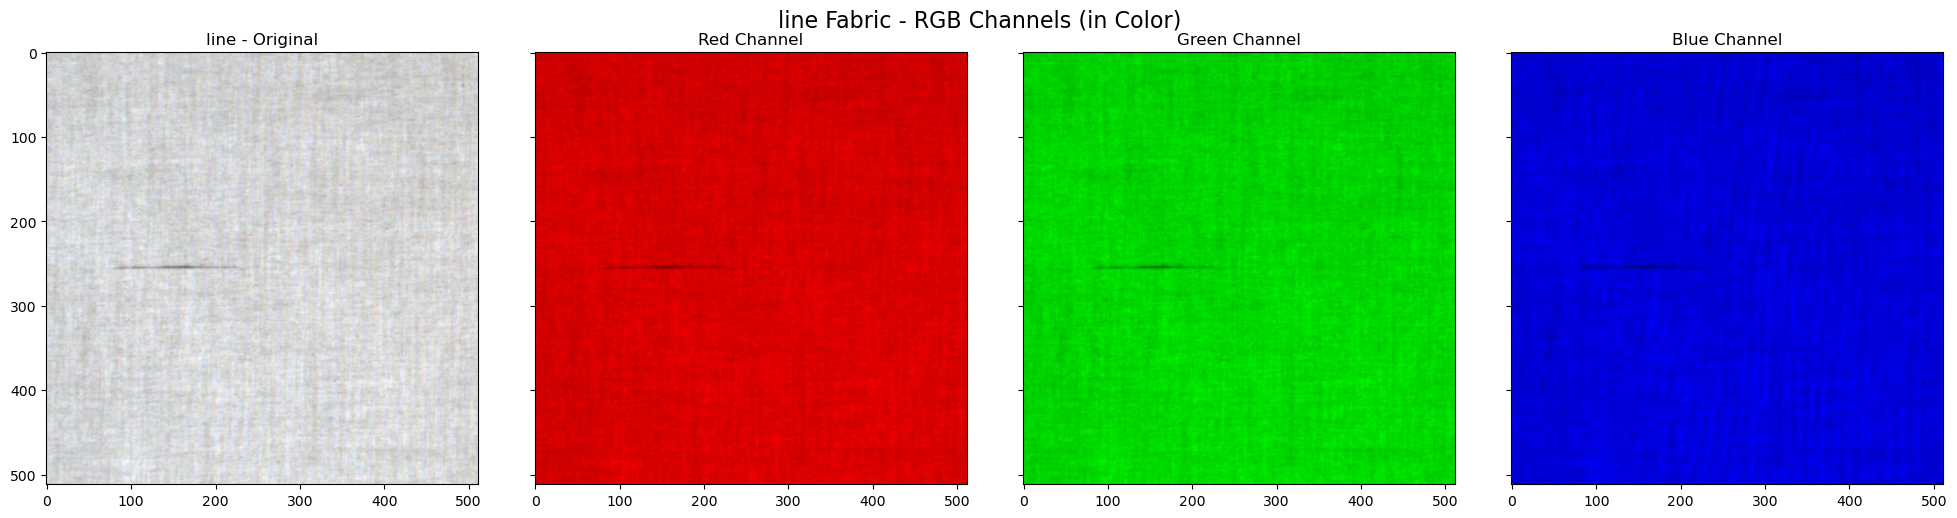

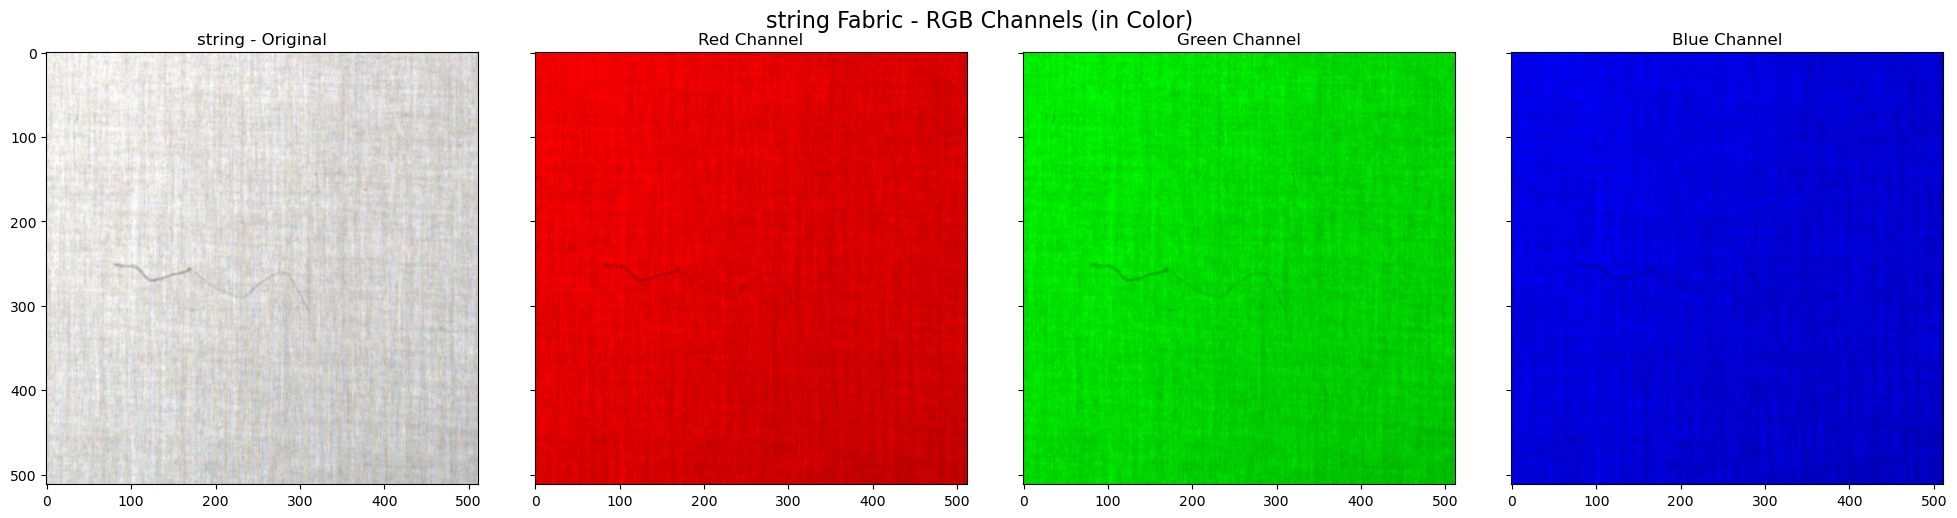

In [19]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to create a tinted RGB channel image
def get_channel_image(image_array, channel_index):
    channel_img = np.zeros_like(image_array)
    channel_img[:, :, channel_index] = image_array[:, :, channel_index]
    return channel_img

# --- Plot for Normal Image ---
# Folder path for normal images
normal_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\normal'
normal_files = [f for f in os.listdir(normal_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]
if not normal_files:
    raise ValueError("No valid image files found in the normal folder.")
normal_image_path = os.path.join(normal_folder, normal_files[0])
normal_image = Image.open(normal_image_path).convert("RGB")
normal_array = np.array(normal_image)

fig1, (n1, n2, n3, n4) = plt.subplots(1, 4, sharey=True, figsize=(20, 5))
n1.imshow(normal_array)
n1.set_title("Normal - Original")

n2.imshow(get_channel_image(normal_array, 0))  # Red
n2.set_title("Normal - Red Channel")

n3.imshow(get_channel_image(normal_array, 1))  # Green
n3.set_title("Normal - Green Channel")

n4.imshow(get_channel_image(normal_array, 2))  # Blue
n4.set_title("Normal - Blue Channel")

fig1.suptitle('Normal Fabric - RGB Channels (in Color)', fontsize=16)
plt.tight_layout()
plt.show()

# --- Plot for Defect Images from each subfolder ---
defect_folder = r'C:\Users\Global\Fabric project\WFDD\grey cloth\defect'

# Get all subfolders in the defect folder
defect_subfolders = [d for d in os.listdir(defect_folder) if os.path.isdir(os.path.join(defect_folder, d))]

if not defect_subfolders:
    raise ValueError("No subfolders found in the defect folder.")

for subfolder in defect_subfolders:
    subfolder_path = os.path.join(defect_folder, subfolder)
    defect_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]
    
    if not defect_files:
        print(f"No valid images found in the defect subfolder: {subfolder}")
        continue
    
    defect_image_path = os.path.join(subfolder_path, defect_files[0])
    defect_image = Image.open(defect_image_path).convert("RGB")
    defect_array = np.array(defect_image)
    
    # Create a figure for the current defect type
    fig, (d1, d2, d3, d4) = plt.subplots(1, 4, sharey=True, figsize=(20, 5))
    d1.imshow(defect_array)
    d1.set_title(f"{subfolder} - Original")
    
    d2.imshow(get_channel_image(defect_array, 0))  # Red channel
    d2.set_title("Red Channel")
    
    d3.imshow(get_channel_image(defect_array, 1))  # Green channel
    d3.set_title("Green Channel")
    
    d4.imshow(get_channel_image(defect_array, 2))  # Blue channel
    d4.set_title("Blue Channel")
    
    fig.suptitle(f"{subfolder} Fabric - RGB Channels (in Color)", fontsize=16)
    plt.tight_layout()
    plt.show()
